## Detailed EDA

This notebooks is used to perform a detailed EDA on the dataset. This objective is to get a better understanding of the data and to extract insights that can be used to build the model.

In [1]:
import pandas as pd

In [2]:
import sys
import os

# Get the current file's directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))


In [3]:
from data_cleaning import clean_data

In [4]:
clean_data(file_path='C:/Users/danie/Documents/GitHub/customer-loyalty-segmentation/data/raw/online_retail_II.xlsx',
           output_path='C:/Users/danie/Documents/GitHub/customer-loyalty-segmentation/data/processed/clean_data.csv')

In [15]:
df = pd.read_csv('C:/Users/danie/Documents/GitHub/customer-loyalty-segmentation/data/processed/clean_data.csv')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

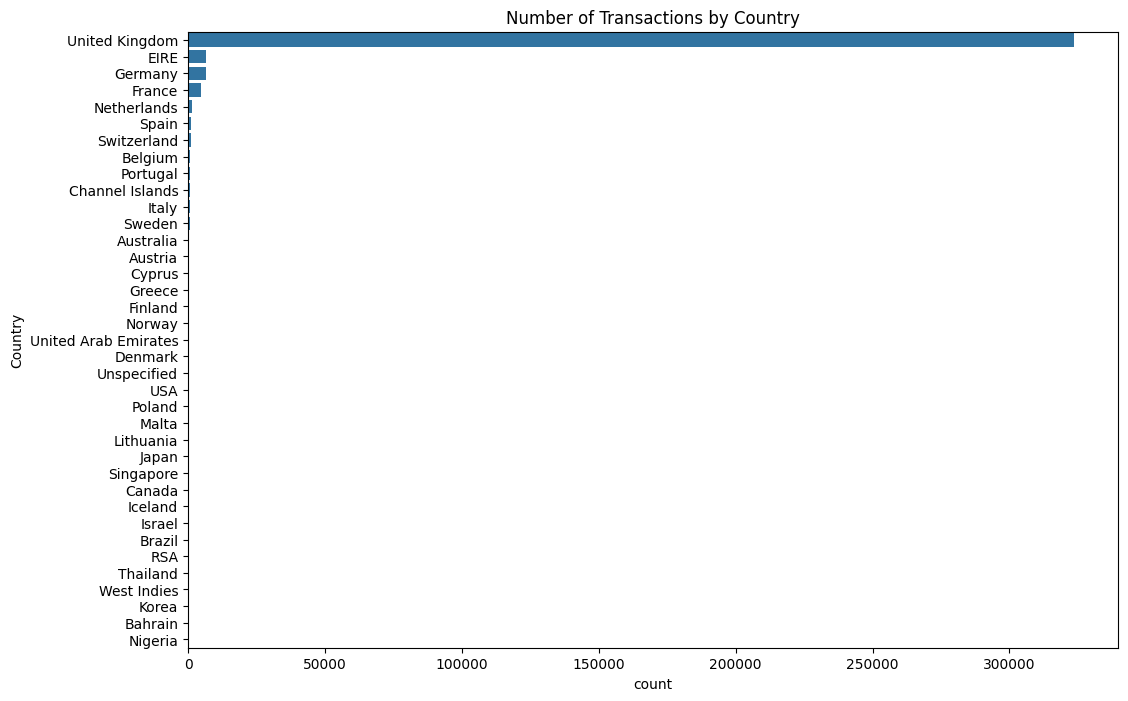

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Transactions by Country')
plt.show()

In [11]:
# The greatest amount of sales is in the United Kingdom. I decided to focus on this country in this project.
df = df[df['Country'] == 'United Kingdom']

In [19]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
352757,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
352758,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
352759,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
352760,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


#### General visualization of variables

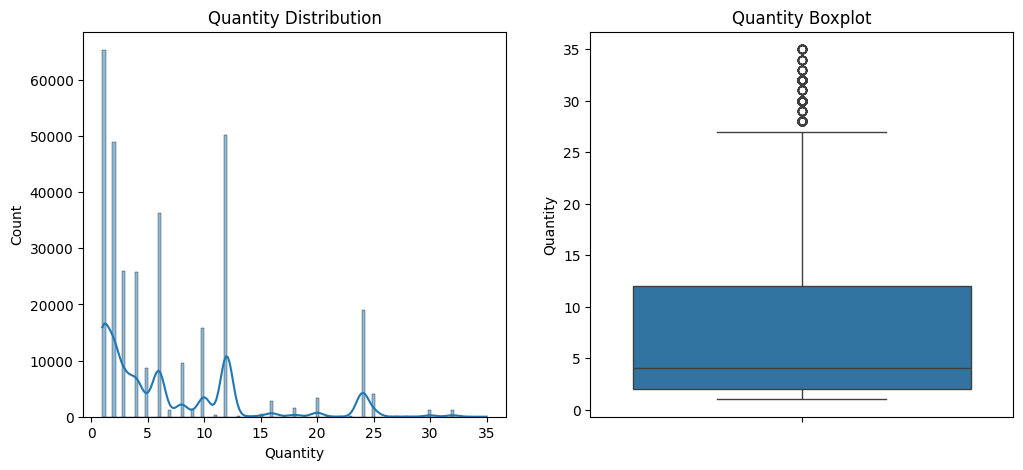

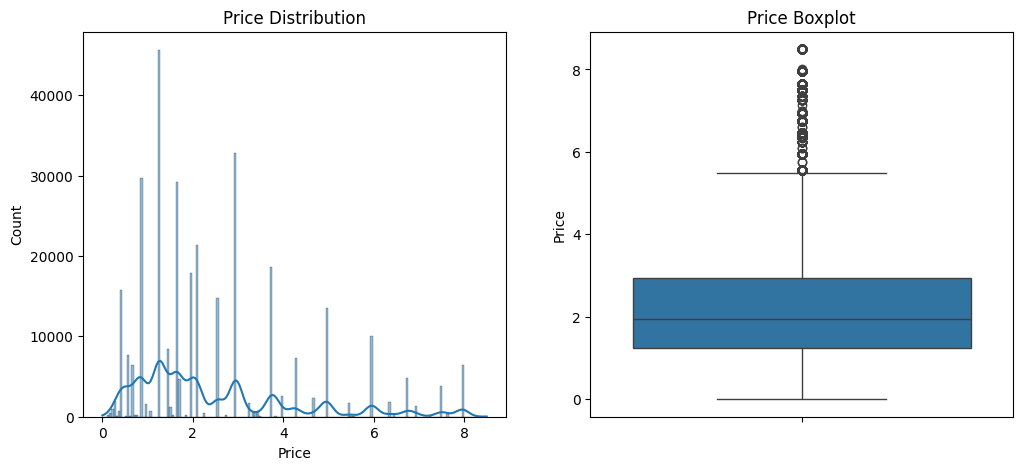

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], kde=True)
plt.title('Quantity Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(df['Quantity'])
plt.title('Quantity Boxplot')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])
plt.title('Price Boxplot')
plt.show()

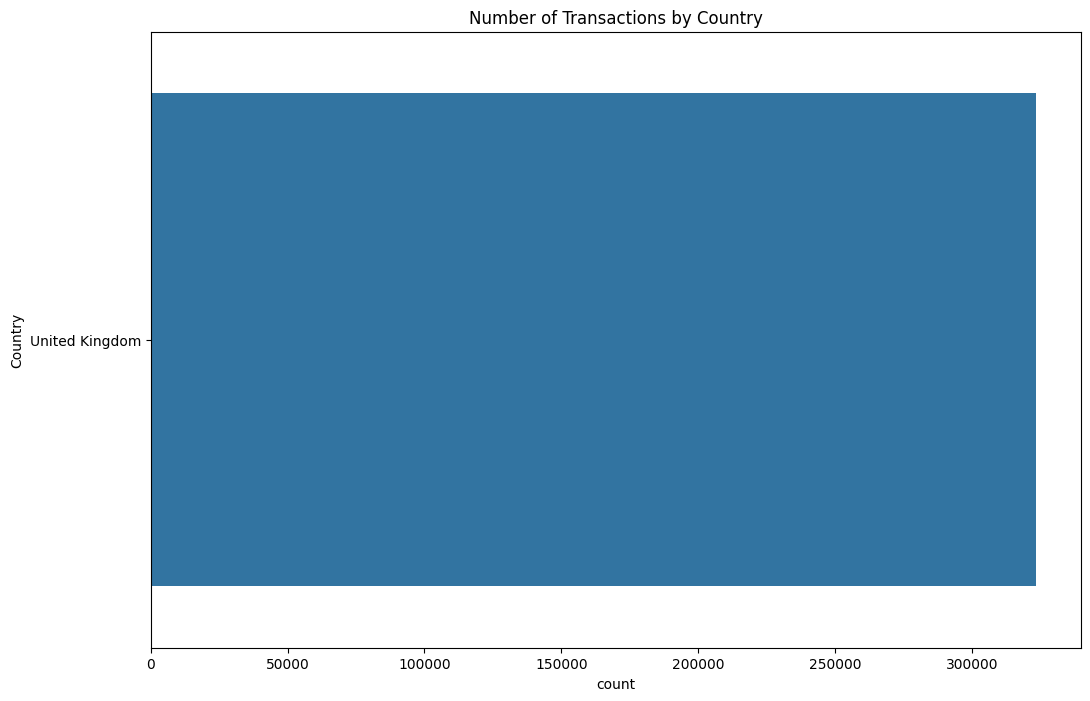

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Transactions by Country')
plt.show()

#### Correlations analysis

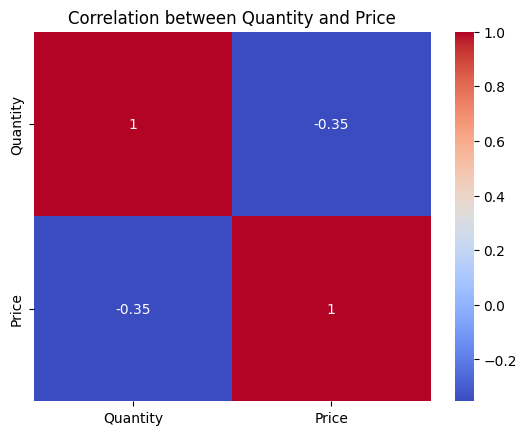

In [21]:
corr_num = df[['Quantity', 'Price']].corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title('Correlation between Quantity and Price')
plt.show()

#### Clients analysis

             Quantity     Price  Transactions
Customer ID                                  
12346.0            70  6.253333            33
12347.0           789  2.167391            69
12348.0           373  0.719500            20
12349.0           914  3.147614            88
12351.0           260  1.835500            20


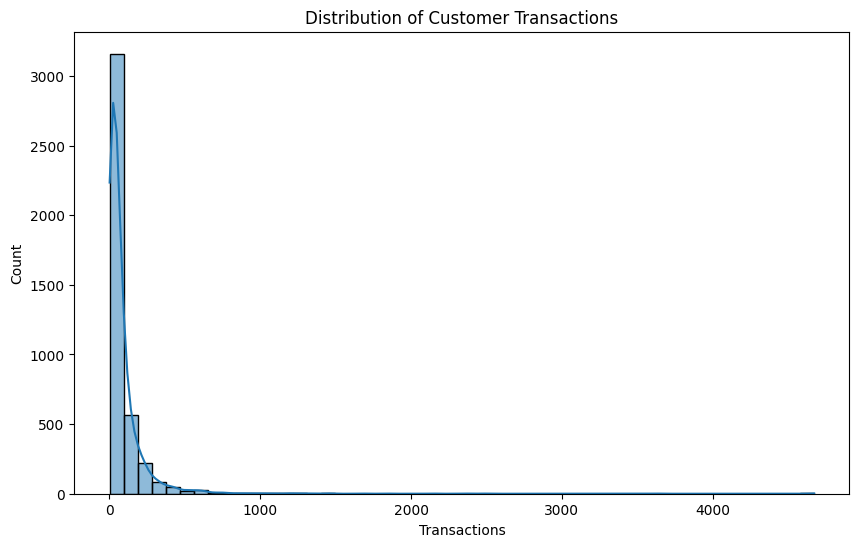

In [27]:
customer_stats = df.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'Price': 'mean',
    'Invoice': 'count'
}).rename(columns={'Invoice': 'Transactions'})

print(customer_stats.head())

plt.figure(figsize=(10, 6))
sns.histplot(customer_stats['Transactions'], bins=50, kde=True)
plt.title('Distribution of Customer Transactions')
plt.show()

#### RMF analysis: Recency, Frequency and Monetary

             Recency  Frequency  Monetary
Customer ID                              
12346.0          164         33    206.36
12347.0            2         69    149.55
12348.0           73         20     14.39
12349.0           42         88    276.99
12351.0           10         20     36.71


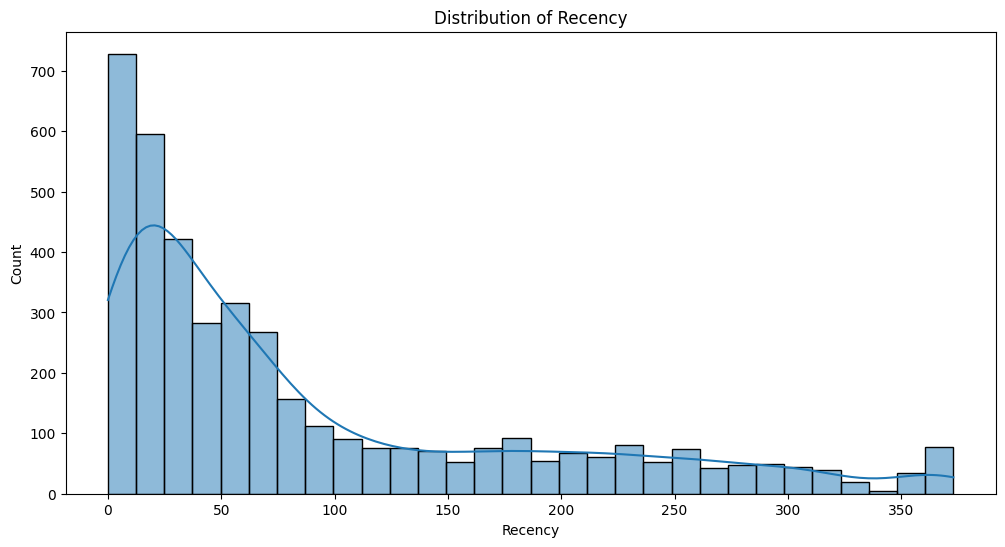

In [25]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
latest_date = df['InvoiceDate'].max()

rmf = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'Invoice' : 'count',
    'Price' : 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Price': 'Monetary'})

print(rmf.head())

plt.figure(figsize=(12, 6))
sns.histplot(rmf['Recency'], bins=30, kde=True)
plt.title('Distribution of Recency')
plt.show()